# ¡Hola, Santiago!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

El propósito de este proyecto, es análizar cual es el plan mobil más rentable, para esto, vamos a análizar una serie de dataframes que incluyen la información de cada usuario, en cuanto a consumo y tarifas, vamos a análizar cada dataframe, haciendo limpieza de datos, eliminando ausentes y duplicados, posteriormente vamos a identificar que información nos es útil para el análisis estadistico, y posteriormente uniremos los dataframes con dicha información importante. Posteriormente haremos el análisis mediante pruebas de hipotesis y análisis exploratorio de datos.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import math
from scipy import stats as st
import matplotlib.pyplot as plt


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_calls=pd.read_csv('/datasets/megaline_calls.csv')
df_internet=pd.read_csv('/datasets/megaline_internet.csv')
df_messages=pd.read_csv('/datasets/megaline_messages.csv')
df_plans=pd.read_csv('/datasets/megaline_plans.csv')
df_user=pd.read_csv('/datasets/megaline_users.csv')



<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Hola, Santiago. Debemos asegurarnos de que nuestro código se ejecute apropiadamente. Parece ser que las rutas empleadas no funcionan en la plataforma. Volveremos con la corrección una vez podamos verificar tu código.
</div>
<div class="alert alert-block alert-info">
<b>Hola, perdón, me pasé a Visual Studio Code y no supe como poner las rutas jeje, ya debería funcionar.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Corregido.
</div>

## Preparar los datos

In [3]:
print(df_calls.head())
print(df_calls.info())
print()
print(df_internet.head())
print(df_internet.info())
print()
print(df_messages.head())
print(df_messages.info())
print()
print(df_plans.head())
print(df_plans.info())
print()
print(df_user.head())
print(df_user.info())

df_calls['user_id']=df_calls['user_id'].astype('str')
df_internet['user_id']=df_internet['user_id'].astype('str')
df_messages['user_id']=df_messages['user_id'].astype('str')
df_user['user_id']=df_user['user_id'].astype('str')

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 ent

Pasamos la columna 'user_id' a datos de tipo string, debido a que este numero identifica a cada usuario, pero no es necesario hacer cálculos con este numero y puede generarnos un error.

## Identificación de ausentes y duplicados.

In [4]:
print('Ausentes llamadas:\n', df_calls.isna().sum())
print('Ausentes internet:\n',df_internet.isna().sum())
print('Ausentes mensajes:\n',df_messages.isna().sum())
print('Ausentes planes:\n',df_plans.isna().sum())
print('Ausentes usuarios:\n',df_user.isna().sum())

Ausentes llamadas:
 id           0
user_id      0
call_date    0
duration     0
dtype: int64
Ausentes internet:
 id              0
user_id         0
session_date    0
mb_used         0
dtype: int64
Ausentes mensajes:
 id              0
user_id         0
message_date    0
dtype: int64
Ausentes planes:
 messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64
Ausentes usuarios:
 user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


In [5]:
print('Duplicados llamadas:\n', df_calls.duplicated().sum())
print('Duplicados internet:\n',df_internet.duplicated().sum())
print('Duplicados mensajes:\n',df_messages.duplicated().sum())
print('Duplicados planes:\n',df_plans.duplicated().sum())
print('Duplicados usuarios:\n',df_user.duplicated().sum())

Duplicados llamadas:
 0
Duplicados internet:
 0
Duplicados mensajes:
 0
Duplicados planes:
 0
Duplicados usuarios:
 0


In [6]:
print('Duplicados llamadas:\n', df_calls['id'].duplicated().sum())
print('Duplicados internet:\n',df_internet['id'].duplicated().sum())
print('Duplicados mensajes:\n',df_messages['id'].duplicated().sum())

Duplicados llamadas:
 0
Duplicados internet:
 0
Duplicados mensajes:
 0


## Tarifas

In [7]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

print(df_plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [8]:
# Imprime una muestra de los datos para las tarifas
print(df_plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


Podemos ver las características de cada plan en gigas y costo, además que los datos están correctos. No tenemos que editar nada y la información está completa.

## Enriquecer los datos

In [9]:
df_plans['gb_per_month_included']=[15,30]
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


Agregamos las gigas por mes que incluye cada plan.

## Usuarios/as

In [10]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_user.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    object
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(1), object(7)
memory usage: 31.4+ KB


In [11]:
# Imprime una muestra de datos para usuarios
df_user.sample(10)



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
91,1091,Taylor,Oliver,38,"Riverside-San Bernardino-Ontario, CA MSA",2018-05-04,ultimate,NaN
220,1220,Jack,Strong,26,"Cincinnati, OH-KY-IN MSA",2018-04-22,surf,2018-10-13
66,1066,Ariel,Woods,61,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-08,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
341,1341,Kaila,Andrews,28,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-17,surf,NaN
400,1400,Kenton,Hickman,72,"Riverside-San Bernardino-Ontario, CA MSA",2018-03-08,surf,NaN
457,1457,Janean,Lynch,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-17,surf,NaN
255,1255,Kennith,Rowland,22,"Oklahoma City, OK MSA",2018-08-01,ultimate,NaN
440,1440,France,Barrett,49,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-04-16,surf,NaN


Podemos ver que los datos están bien, sin embargo, los ausentes de la columna 'churn_date' los podemos reemplazar por la palabra 'actual', para identificar que aún están suscritos al plan.

### Corregir los datos

In [12]:
df_user['churn_date']=df_user['churn_date'].fillna('actual')
df_user.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
347,1347,Trey,Lynch,65,"Charleston-North Charleston, SC MSA",2018-06-17,ultimate,actual
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,actual
348,1348,Carl,Rutledge,60,"Detroit-Warren-Dearborn, MI MSA",2018-10-05,surf,actual
338,1338,Janise,Bowman,21,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-08-09,surf,actual
37,1037,Reena,Velazquez,20,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-11,ultimate,actual
457,1457,Janean,Lynch,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-17,surf,actual
227,1227,Vanesa,Willis,29,"Dallas-Fort Worth-Arlington, TX MSA",2018-01-17,surf,actual
357,1357,Ria,Beach,61,"Baton Rouge, LA MSA",2018-05-30,surf,actual
80,1080,Neal,Mcgee,45,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-03,surf,actual
393,1393,Wilfredo,Rosa,44,"Knoxville, TN MSA",2018-10-29,surf,actual


Los datos se ven bien, no tenemos valores ausentes y la información está completa.

## Enriquecer los datos

In [13]:
df_user['reg_date']=pd.to_datetime(df_user['reg_date'])
df_user['month']=df_user['reg_date'].dt.month
df_user.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,actual,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,actual,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,actual,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,actual,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,actual,5
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,actual,11
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,11
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,actual,7
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,actual,8
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,actual,4


Agregamos la columna 'month' al data frame para los análisis.

## Llamadas

In [14]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  object 
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), object(3)
memory usage: 4.2+ MB


In [15]:
# Imprime una muestra de datos para las llamadas
df_calls.sample(10)


,id,user_id,call_date,duration
135150,1490_250,1490,2018-07-31,3.94
97478,1347_304,1347,2018-09-27,13.01
70394,1251_405,1251,2018-07-08,23.02
82895,1299_553,1299,2018-04-11,10.95
46903,1170_983,1170,2018-11-13,0.00
43728,1159_324,1159,2018-09-05,11.24
12856,1055_263,1055,2018-06-16,11.72
26889,1101_216,1101,2018-05-29,3.21
125476,1444_6,1444,2018-12-11,0.00
7655,1036_247,1036,2018-07-19,0.00


Los datos se ven bien, no tenemos valores ausentes y la información está completa.

## Enriquecer los datos

In [16]:
df_calls['call_date']=pd.to_datetime(df_calls['call_date'])
df_calls['month']=df_calls['call_date'].dt.month
df_calls.head(10)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12
5,1000_388,1000,2018-12-31,2.20,12
6,1000_510,1000,2018-12-27,5.75,12
7,1000_521,1000,2018-12-28,14.18,12
8,1000_530,1000,2018-12-28,5.77,12
9,1000_544,1000,2018-12-26,4.40,12


Agregamos la columna 'month' al data frame para los análisis.

## Mensajes

In [17]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  object
 2   message_date  76051 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [18]:
# Imprime una muestra de datos para los mensajes
df_messages.sample(10)


,id,user_id,message_date
64412,1410_73,1410,2018-12-04
58659,1373_77,1373,2018-12-16
65454,1421_39,1421,2018-12-16
67349,1435_387,1435,2018-11-09
26405,1159_408,1159,2018-12-02
28771,1175_38,1175,2018-12-11
21560,1132_958,1132,2018-09-30
38804,1254_448,1254,2018-11-17
1528,1015_284,1015,2018-12-10
56635,1358_23,1358,2018-05-14


Los datos se ven bien, no tenemos valores ausentes y la información está completa.

## Enriquecer los datos

In [19]:
df_messages['message_date']=pd.to_datetime(df_messages['message_date'])
df_messages['month']=df_messages['message_date'].dt.month
df_messages.head(10)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
5,1000_346,1000,2018-12-29,12
6,1000_386,1000,2018-12-30,12
7,1000_413,1000,2018-12-31,12
8,1000_502,1000,2018-12-27,12
9,1000_525,1000,2018-12-28,12


Agregamos la columna 'month' al data frame para los análisis.

## Internet

In [20]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  object 
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), object(3)
memory usage: 3.2+ MB


In [21]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.sample(10)


,id,user_id,session_date,mb_used
3683,1022_94,1022,2018-11-18,78.64
20694,1095_390,1095,2018-08-07,0.00
102229,1490_44,1490,2018-08-06,668.64
31959,1145_95,1145,2018-11-04,169.86
32221,1145_357,1145,2018-08-21,239.08
60779,1277_82,1277,2018-11-26,190.32
52981,1239_90,1239,2018-12-25,591.56
83580,1390_135,1390,2018-06-18,210.81
50440,1224_327,1224,2018-09-22,167.51
15214,1068_330,1068,2018-08-23,0.00


Los datos se ven bien, no tenemos valores ausentes y la información está completa.

## Enriquecer los datos

In [22]:
df_internet['session_date']=pd.to_datetime(df_internet['session_date'])
df_internet['month']=df_internet['session_date'].dt.month
df_internet.head(10)

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
5,1001_0,1001,2018-08-24,284.68,8
6,1001_3,1001,2018-12-09,656.04,12
7,1001_4,1001,2018-11-04,16.97,11
8,1001_10,1001,2018-11-27,135.18,11
9,1001_15,1001,2018-12-13,761.92,12


Agregamos la columna 'month' al data frame para los análisis.

## Estudiar las condiciones de las tarifas

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


## Agregar datos por usuario

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_month=df_calls.groupby(['user_id','month'],as_index=False)['id'].count()
calls_per_month.head(10)
calls_per_month.columns=['user_id','month','calls']
calls_per_month

,user_id,month,calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
#Se redondea antes del groupby
df_calls['duration']=np.ceil(df_calls['duration'])
minutes_per_month=df_calls.groupby(['user_id','month'],as_index=False)['duration'].sum()
minutes_per_month.columns=['user_id','month','minutes']
minutes_per_month.head(10)

,user_id,month,minutes
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
5,1001,12,412.0
6,1002,10,59.0
7,1002,11,386.0
8,1002,12,384.0
9,1003,12,1104.0


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
~Debemos redondear la duración de las llamadas antes de sumarlas. Esto lo puedes hacer con la función `np.ceil` de `numpy`.~
</div>

<div class="alert alert-block alert-info">
<b>Se redondearon los minutos</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Debes hacerlo antes del `groupby`, no después.
</div>

<div class="alert alert-block alert-info">
<b>Se redondearon los minutos antes del groupby</b> <a class="tocSkip"></a>
</div>

In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_month=df_messages.groupby(['user_id','month'],as_index=False)['id'].count()
messages_per_month.columns=['user_id','month','messages']
messages_per_month.head(10)


,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
5,1001,12,44
6,1002,10,15
7,1002,11,32
8,1002,12,41
9,1003,12,50


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_per_month=df_internet.groupby(['user_id','month'],as_index=False)['mb_used'].sum()
internet_per_month['gb_used']=(internet_per_month['mb_used']/(1024))
internet_per_month['gb_used']=np.ceil(internet_per_month['gb_used'])
internet_per_month.head(10)


,user_id,month,mb_used,gb_used
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0
5,1001,12,19369.18,19.0
6,1002,10,6552.01,7.0
7,1002,11,19345.08,19.0
8,1002,12,14396.24,15.0
9,1003,12,27044.14,27.0


Fusionamos todos los dataframes en uno llamado 'df_merged'

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
df_merged=calls_per_month.merge(minutes_per_month.merge(messages_per_month.merge(internet_per_month,how='outer'),how='outer'),how='outer')
df_merged=df_merged.fillna(0)
df_merged.head(10)


,user_id,month,calls,minutes,messages,mb_used,gb_used
0,1000,12,16.0,124.0,11.0,1901.47,2.0
1,1001,8,27.0,182.0,30.0,6919.15,7.0
2,1001,9,49.0,315.0,44.0,13314.82,14.0
3,1001,10,65.0,393.0,53.0,22330.49,22.0
4,1001,11,64.0,426.0,36.0,18504.30,19.0
5,1001,12,56.0,412.0,44.0,19369.18,19.0
6,1002,10,11.0,59.0,15.0,6552.01,7.0
7,1002,11,55.0,386.0,32.0,19345.08,19.0
8,1002,12,47.0,384.0,41.0,14396.24,15.0
9,1003,12,149.0,1104.0,50.0,27044.14,27.0


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
~Buen trabajo con este `merge`. Podrías en este punto transformar los megas en gigas y redondear hacia arriba.~
</div>

<div class="alert alert-block alert-info">
<b>Se convirtieron las megas a gigas en otra columna llamada 'gb_used'</b> <a class="tocSkip"></a>
</div>

In [29]:
# Añade la información de la tarifa
df_plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


In [30]:
# Calcula el ingreso mensual para cada usuario
df_name_plan=df_user[['user_id','plan','city']]
df_merged=df_merged.merge(df_name_plan)
df_merged

,user_id,month,calls,minutes,messages,mb_used,gb_used,plan,city
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,49.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,65.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,64.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...,...
2288,1204,12,0.0,0.0,78.0,36730.05,36.0,ultimate,"Chicago-Naperville-Elgin, IL-IN-WI MSA"
2289,1349,10,0.0,0.0,76.0,13093.55,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA"
2290,1349,11,0.0,0.0,72.0,17128.26,17.0,surf,"Boston-Cambridge-Newton, MA-NH MSA"
2291,1349,12,0.0,0.0,61.0,13039.91,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA"


In [31]:
def cero(ingreso):
    if ingreso<0:
        ingreso=0

    return ingreso

Calculamos los ingresos itilizando la función where.

In [32]:
df_merged=df_merged.merge(df_plans,right_on='plan_name',left_on='plan')

In [33]:
df_merged=df_merged.drop(columns='plan_name')

In [34]:
df_merged['minutes_total']=(df_merged['minutes']-df_merged['minutes_included'])
df_merged['messages_total']=df_merged['messages']-df_merged['messages_included']
df_merged['gb_total']=df_merged['gb_used']-df_merged['gb_per_month_included']



<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
~Ten presente que el operador cobra por gigas, no por megas. Sería mejor si en este punto estas columnas de megas estuvieran transformadas en gigas.~
</div>

<div class="alert alert-block alert-info">
<b>Se convirtió previamente a gigas</b> <a class="tocSkip"></a>
</div>

In [35]:
df_merged.head(10)

,user_id,month,calls,minutes,messages,mb_used,gb_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,minutes_total,messages_total,gb_total
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,30,-2876.0,-989.0,-28.0
1,1006,11,2.0,10.0,15.0,2068.37,3.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,30,-2990.0,-985.0,-27.0
2,1006,12,9.0,59.0,139.0,32118.82,32.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,30,-2941.0,-861.0,2.0
3,1008,10,71.0,476.0,21.0,17106.99,17.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,30,-2524.0,-979.0,-13.0
4,1008,11,63.0,446.0,37.0,23676.72,24.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,30,-2554.0,-963.0,-6.0
5,1008,12,85.0,634.0,26.0,14689.33,15.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,30,-2366.0,-974.0,-15.0
6,1011,6,19.0,118.0,21.0,6685.11,7.0,ultimate,"Cleveland-Elyria, OH MSA",1000,30720,3000,70,7,0.01,0.01,30,-2882.0,-979.0,-23.0
7,1011,7,63.0,499.0,53.0,21046.41,21.0,ultimate,"Cleveland-Elyria, OH MSA",1000,30720,3000,70,7,0.01,0.01,30,-2501.0,-947.0,-9.0
8,1011,8,61.0,486.0,54.0,21099.37,21.0,ultimate,"Cleveland-Elyria, OH MSA",1000,30720,3000,70,7,0.01,0.01,30,-2514.0,-946.0,-9.0
9,1011,9,73.0,484.0,60.0,16638.46,17.0,ultimate,"Cleveland-Elyria, OH MSA",1000,30720,3000,70,7,0.01,0.01,30,-2516.0,-940.0,-13.0


In [36]:
df_merged['minutes_total']=df_merged['minutes_total'].apply(cero)
df_merged['messages_total']=df_merged['messages_total'].apply(cero)
df_merged['gb_total']=df_merged['gb_total'].apply(cero)

In [37]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   object 
 1   month                  2293 non-null   int64  
 2   calls                  2293 non-null   float64
 3   minutes                2293 non-null   float64
 4   messages               2293 non-null   float64
 5   mb_used                2293 non-null   float64
 6   gb_used                2293 non-null   float64
 7   plan                   2293 non-null   object 
 8   city                   2293 non-null   object 
 9   messages_included      2293 non-null   int64  
 10  mb_per_month_included  2293 non-null   int64  
 11  minutes_included       2293 non-null   int64  
 12  usd_monthly_pay        2293 non-null   int64  
 13  usd_per_gb             2293 non-null   int64  
 14  usd_per_message        2293 non-null   float64
 15  usd_

In [38]:
df_merged.head(10)

,user_id,month,calls,minutes,messages,mb_used,gb_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,minutes_total,messages_total,gb_total
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,30,0.0,0.0,0.0
1,1006,11,2.0,10.0,15.0,2068.37,3.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,30,0.0,0.0,0.0
2,1006,12,9.0,59.0,139.0,32118.82,32.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,30,0.0,0.0,2.0
3,1008,10,71.0,476.0,21.0,17106.99,17.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,30,0.0,0.0,0.0
4,1008,11,63.0,446.0,37.0,23676.72,24.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,30,0.0,0.0,0.0
5,1008,12,85.0,634.0,26.0,14689.33,15.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,30,0.0,0.0,0.0
6,1011,6,19.0,118.0,21.0,6685.11,7.0,ultimate,"Cleveland-Elyria, OH MSA",1000,30720,3000,70,7,0.01,0.01,30,0.0,0.0,0.0
7,1011,7,63.0,499.0,53.0,21046.41,21.0,ultimate,"Cleveland-Elyria, OH MSA",1000,30720,3000,70,7,0.01,0.01,30,0.0,0.0,0.0
8,1011,8,61.0,486.0,54.0,21099.37,21.0,ultimate,"Cleveland-Elyria, OH MSA",1000,30720,3000,70,7,0.01,0.01,30,0.0,0.0,0.0
9,1011,9,73.0,484.0,60.0,16638.46,17.0,ultimate,"Cleveland-Elyria, OH MSA",1000,30720,3000,70,7,0.01,0.01,30,0.0,0.0,0.0


In [39]:
df_merged['ingreso']=0
df_merged['ingreso']=df_merged['ingreso'].where((df_merged['plan']!='surf'),(df_merged['minutes_total']*0.03)+(df_merged['messages_total']*0.03)+((df_merged['gb_total'])*10)+20)
df_merged['ingreso']=df_merged['ingreso'].where((df_merged['plan']=='surf'),(df_merged['minutes_total']*0.01)+(df_merged['messages_total']*0.01)+((df_merged['gb_total'])*7)+70)
df_surf=df_merged[df_merged['plan']=='surf']
df_ult=df_merged[df_merged['plan']=='ultimate']
df_surf['ingresos']=df_merged['ingreso'].where((df_merged['ingreso']>0),20)
df_ult['ingresos']=df_merged['ingreso'].where((df_merged['ingreso']>0),70)


/tmp/ipykernel_151/846064510.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_surf['ingresos']=df_merged['ingreso'].where((df_merged['ingreso']>0),20)
/tmp/ipykernel_151/846064510.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ult['ingresos']=df_merged['ingreso'].where((df_merged['ingreso']>0),70)


Creamos otro dataframe conjunto para unir los resultados del plan surf y el plan ultimate mediante concat()

In [40]:
df_merged2=pd.concat([df_surf,df_ult],axis=0)
df_merged2

,user_id,month,calls,minutes,messages,mb_used,gb_used,plan,city,messages_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,minutes_total,messages_total,gb_total,ingreso,ingresos
720,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,20,10,0.03,0.03,15,0.0,0.0,0.0,20.00,20.00
721,1001,9,49.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,20,10,0.03,0.03,15,0.0,0.0,0.0,20.00,20.00
722,1001,10,65.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,20,10,0.03,0.03,15,0.0,3.0,7.0,90.09,90.09
723,1001,11,64.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,20,10,0.03,0.03,15,0.0,0.0,4.0,60.00,60.00
724,1001,12,56.0,412.0,44.0,19369.18,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,20,10,0.03,0.03,15,0.0,0.0,4.0,60.00,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1493,12,65.0,473.0,0.0,15289.09,15.0,ultimate,"Boston-Cambridge-Newton, MA-NH MSA",1000,...,70,7,0.01,0.01,30,0.0,0.0,0.0,70.00,70.00
716,1497,12,54.0,300.0,50.0,11106.55,11.0,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA",1000,...,70,7,0.01,0.01,30,0.0,0.0,0.0,70.00,70.00
717,1204,11,0.0,0.0,42.0,21346.95,21.0,ultimate,"Chicago-Naperville-Elgin, IL-IN-WI MSA",1000,...,70,7,0.01,0.01,30,0.0,0.0,0.0,70.00,70.00
718,1204,12,0.0,0.0,78.0,36730.05,36.0,ultimate,"Chicago-Naperville-Elgin, IL-IN-WI MSA",1000,...,70,7,0.01,0.01,30,0.0,0.0,6.0,112.00,112.00


In [41]:
df_merged[df_merged['plan']=='ultimate'].tail(20)

,user_id,month,calls,minutes,messages,mb_used,gb_used,plan,city,messages_included,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,minutes_total,messages_total,gb_total,ingreso
700,1478,12,58.0,376.0,14.0,22560.06,23.0,ultimate,"Portland-Vancouver-Hillsboro, OR-WA MSA",1000,...,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,70.0
701,1482,11,115.0,785.0,87.0,20245.80,20.0,ultimate,"New York-Newark-Jersey City, NY-NJ-PA MSA",1000,...,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,70.0
702,1482,12,5.0,56.0,5.0,560.33,1.0,ultimate,"New York-Newark-Jersey City, NY-NJ-PA MSA",1000,...,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,70.0
703,1482,10,0.0,0.0,2.0,0.00,0.0,ultimate,"New York-Newark-Jersey City, NY-NJ-PA MSA",1000,...,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,70.0
704,1487,12,56.0,416.0,66.0,13992.39,14.0,ultimate,"Cape Coral-Fort Myers, FL MSA",1000,...,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,70.0
705,1490,7,16.0,126.0,0.0,6411.52,7.0,ultimate,"Sacramento–Roseville–Folsom, CA MSA",1000,...,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,70.0
706,1490,8,80.0,517.0,0.0,39316.23,39.0,ultimate,"Sacramento–Roseville–Folsom, CA MSA",1000,...,3000,70,7,0.01,0.01,30,0.0,0.0,9.0,133.0
707,1490,9,68.0,526.0,0.0,36147.19,36.0,ultimate,"Sacramento–Roseville–Folsom, CA MSA",1000,...,3000,70,7,0.01,0.01,30,0.0,0.0,6.0,112.0
708,1490,10,43.0,253.0,0.0,36997.03,37.0,ultimate,"Sacramento–Roseville–Folsom, CA MSA",1000,...,3000,70,7,0.01,0.01,30,0.0,0.0,7.0,119.0
709,1490,11,55.0,448.0,0.0,25817.03,26.0,ultimate,"Sacramento–Roseville–Folsom, CA MSA",1000,...,3000,70,7,0.01,0.01,30,0.0,0.0,0.0,70.0


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Debemos trabajar en la construcción del cálculo del ingreso:
    
1. Redondeo de duración de llamadas.

</div>

<div class="alert alert-block alert-info">
<b>Se redondearon previamente para el cálculo del ingreso.</b> <a class="tocSkip"></a>
</div>

## Estudia el comportamiento de usuario

Calculamos el consumo de cada usuario por mes, de llamadas, minutos, mensajes y datos.

### Llamadas

In [42]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
mean_surf=df_merged[df_merged['plan']=='surf'].groupby(['month'],as_index=False)['minutes'].mean()
mean_ultimate=df_merged[df_merged['plan']=='ultimate'].groupby(['month'],as_index=False)['minutes'].mean()


In [43]:
print(mean_surf)
print(mean_ultimate)

    month     minutes
0       1  203.000000
1       2  297.000000
2       3  330.000000
3       4  351.540000
4       5  399.584416
5       6  431.298969
6       7  449.983471
7       8  410.111111
8       9  414.226804
9      10  429.729958
10     11  423.325088
11     12  473.836478
    month     minutes
0       1  193.500000
1       2  403.142857
2       3  304.250000
3       4  336.857143
4       5  406.241379
5       6  370.957447
6       7  427.067797
7       8  421.436620
8       9  437.511628
9      10  450.735849
10     11  445.196850
11     12  459.099338


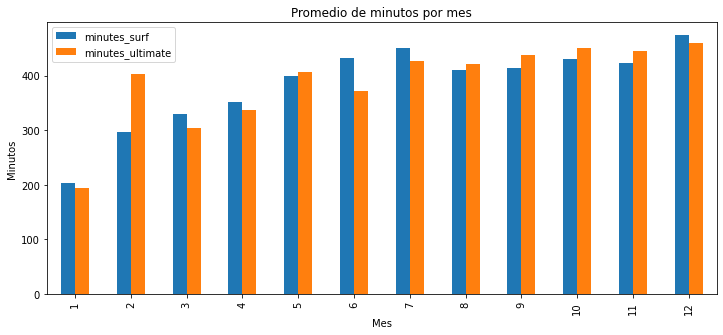

In [44]:
mean_minutes=mean_surf.merge(mean_ultimate, on='month')
mean_minutes.columns=['month','minutes_surf','minutes_ultimate']
mean_minutes.plot(kind='bar', 
           x='month',
           y=['minutes_surf','minutes_ultimate'],
           xlabel='Mes',
           ylabel='Minutos',
           title='Promedio de minutos por mes',
            figsize=[12,5],legend=True)
plt.show()

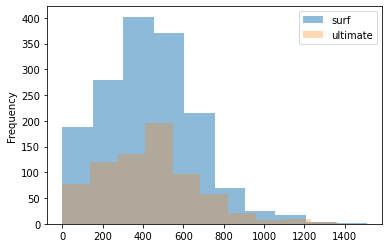

In [45]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
df_surf['minutes'].plot(kind='hist',alpha=0.5)
df_ult['minutes'].plot(kind='hist',alpha=0.3)
plt.legend(['surf','ultimate'])
plt.show()

In [46]:
# Calcula la media y la varianza de la duración mensual de llamadas.
mean_surf=df_surf['minutes'].mean()
mean_ult=df_ult['minutes'].mean()
var_surf=np.var(df_surf['minutes'])
var_ult=np.var(df_ult['minutes'])
print('Media surf: ',mean_surf,'Media ultimate: ',mean_ult,'Varianza surf: ',var_surf,'Varianza ultimate: ',var_ult)

Media surf:  428.7495232040687 Media ultimate:  430.45 Varianza surf:  54933.334591317485 Varianza ultimate:  57764.125277777785


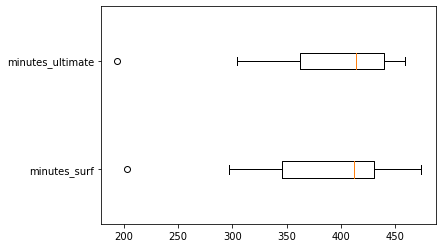

In [47]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.boxplot(mean_minutes[['minutes_surf','minutes_ultimate']], vert=False,labels=['minutes_surf','minutes_ultimate'])
#plt.boxplot(df_ult['minutes'])
plt.show()

Podemos evidenciar un comportamiento parecido de cada plan, de cara a las llamadas, debido a que, su media es similar, y su distribución también. El comportamiento durante el año es creciente, viendo que en enero se hacen menos llamadas y el numero va creciendo, llegando al máximo en diciembre. Adicionalmente, en ninguno de los planes se excede del límite de llamadas.

En cuanto a la media y la varianza, el comportamiento de los datos de cada plan es muy parecidos, con la característica de que el plan ultimate está más disperso que el plan surf.

Podemos agregar la presencia de valores atípicos de algunos usuarios que no consumen muchos minutos, lo cual es normal, debido a que es un servicio que no se usa mucho actualmente.

### Mensajes

In [48]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
mean_surf_messages=df_merged[df_merged['plan']=='surf'].groupby(['month'],as_index=False)['messages'].mean()
mean_ultimate_messages=df_merged[df_merged['plan']=='ultimate'].groupby(['month'],as_index=False)['messages'].mean()

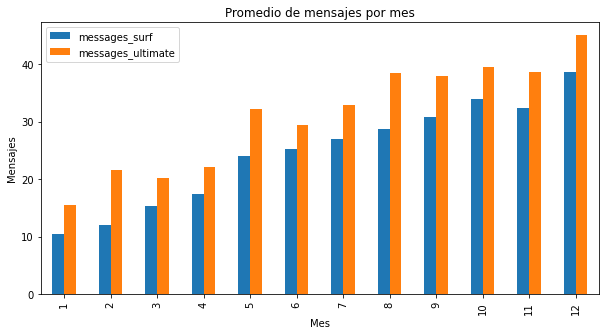

In [49]:
mean_messages=mean_surf_messages.merge(mean_ultimate_messages, on='month')
mean_messages.columns=['month','messages_surf','messages_ultimate']
mean_messages.plot(kind='bar', 
           x='month',
           y=['messages_surf','messages_ultimate'],
           xlabel='Mes',
           ylabel='Mensajes',
           title='Promedio de mensajes por mes',
            figsize=[10,5],legend=True)
plt.show()

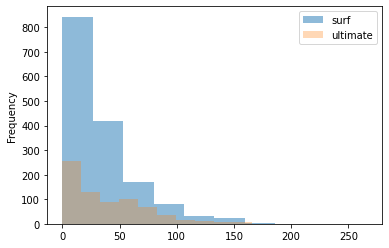

In [50]:
df_surf['messages'].plot(kind='hist',alpha=0.5)
df_ult['messages'].plot(kind='hist',alpha=0.3)
plt.legend(['surf','ultimate'])
plt.show()

In [51]:
mean_surf=df_surf['messages'].mean()
mean_ult=df_ult['messages'].mean()
var_surf=np.var(df_surf['messages'])
var_ult=np.var(df_ult['messages'])
print('Media surf: ',mean_surf,'Media ultimate: ',mean_ult,'Varianza surf: ',var_surf,'Varianza ultimate: ',var_ult)

Media surf:  31.15956770502225 Media ultimate:  37.55138888888889 Varianza surf:  1126.008231726662 Varianza ultimate:  1207.0779147376543


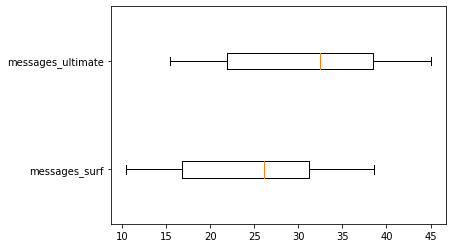

In [52]:
plt.boxplot(mean_messages[['messages_surf','messages_ultimate']], vert=False,labels=['messages_surf','messages_ultimate'])
#plt.boxplot(df_ult['minutes'])
plt.show()

En el caso de los mensajes, sus comportamientos también son similares en ambos planes, destacando que en promedio, ninguno de los planes se pasa del límite mensual de mensajes de texto, adicionalmente, sus medias son similares y su distribución también.

Al igual que los minutos, los mnesajes  varían en la agrupación de los datos, debido a que los datos del plan ultimate están más lejos entre sí que los del plan surf, esto se evidenció calculando la varianza y mirando sus histogramas, podemos ver que los datos del plan últimate están más distribuidos.

Podemos decir también que los datos de ambos planes están sesgados hacia la derecha.

### Internet

In [53]:
mean_surf_internet=df_merged[df_merged['plan']=='surf'].groupby(['month'],as_index=False)['gb_used'].mean()
mean_ultimate_internet=df_merged[df_merged['plan']=='ultimate'].groupby(['month'],as_index=False)['gb_used'].mean()

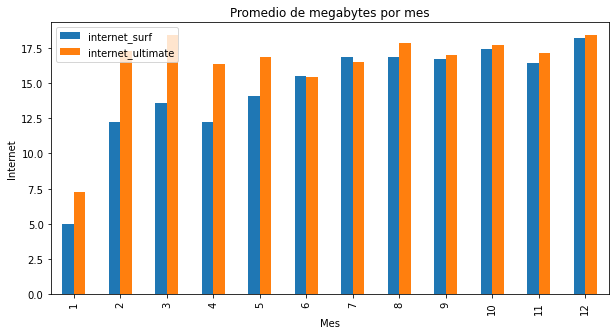

In [54]:
mean_internet=mean_surf_internet.merge(mean_ultimate_internet, on='month')
mean_internet.columns=['month','internet_surf','internet_ultimate']
mean_internet.plot(kind='bar', 
           x='month',
           y=['internet_surf','internet_ultimate'],
           xlabel='Mes',
           ylabel='Internet',
           title='Promedio de megabytes por mes',
            figsize=[10,5],legend=True)
plt.show()

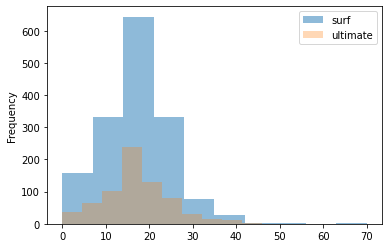

In [55]:
df_surf['gb_used'].plot(kind='hist',alpha=0.5)
df_ult['gb_used'].plot(kind='hist',alpha=0.3)
plt.legend(['surf','ultimate'])
plt.show()

In [56]:
mean_surf=df_surf['gb_used'].mean()
mean_ult=df_ult['gb_used'].mean()
var_surf=np.var(df_surf['mb_used'])
var_ult=np.var(df_ult['mb_used'])
print('Media surf: ',mean_surf,'Media ultimate: ',mean_ult,'\nVarianza surf: ',var_surf,'Varianza ultimate: ',var_ult)

Media surf:  16.670692943420217 Media ultimate:  17.306944444444444 
Varianza surf:  64175571.68301331 Varianza ultimate:  61566665.1386863


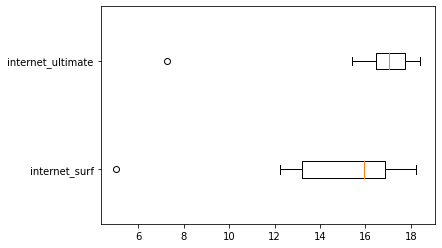

In [57]:
plt.boxplot(mean_internet[['internet_surf','internet_ultimate']], vert=False,labels=['internet_surf','internet_ultimate'])
#plt.boxplot(df_ult['minutes'])
plt.show()

En el caso de los datos de internet, los comportamientos son más variados, en el caso del plan surf, en los primeros meses no se supera el límite, sin embargo , a partír de la segunda mitad de año, todos los meses se sobrepasa el límite, por lo cual sale más rentable que los usuarios se inscriban a este plan, debido a que pagan más adicional. Por otro lado el plan ultimate, no sobrepasa el límite de datos.

Los datos tienen distribuciones normales, sin sesgo, y al igual que los anteriores análisis, la varianza del plan surf es menor que la del plan ultimate, por lo que los datos de ultimate están más distribuidos. 

Podemos evidenciar también la presencia de atipicos que no utilizan mucho internet, esto podria darse por la población mayor que podemos análizar en futuras ocasiones con la edad de los usuarios.

## Ingreso

In [58]:
mean_surf_ingresos=df_surf.groupby(['month'],as_index=False)['ingresos'].mean()
mean_ultimate_ingresos=df_ult.groupby(['month'],as_index=False)['ingresos'].mean()

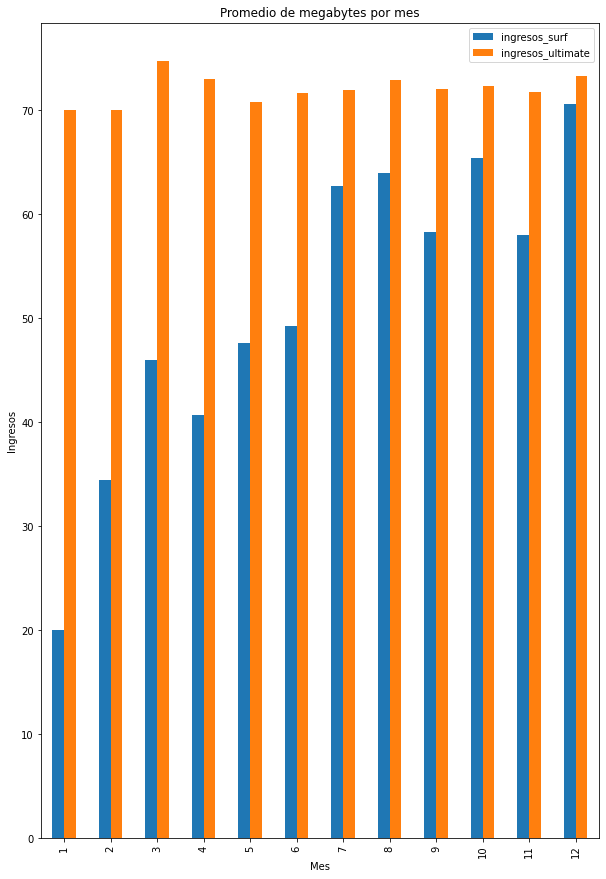

In [59]:
mean_ingresos=mean_surf_ingresos.merge(mean_ultimate_ingresos, on='month')
mean_ingresos.columns=['month','ingresos_surf','ingresos_ultimate']
mean_ingresos.plot(kind='bar', 
           x='month',
           y=['ingresos_surf','ingresos_ultimate'],
           xlabel='Mes',
           ylabel='Ingresos',
           title='Promedio de megabytes por mes',
            figsize=[10,15],legend=True)
plt.show()

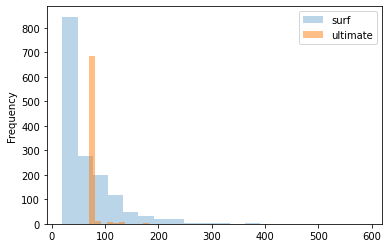

In [60]:
df_surf['ingresos'].plot(kind='hist',alpha=0.3,bins=20)
df_ult['ingresos'].plot(kind='hist',alpha=0.5,bins=10)
plt.legend(['surf','ultimate'])
plt.show()

In [61]:
mean_surf=df_surf['ingresos'].mean()
mean_ult=df_ult['ingresos'].mean()
var_surf=np.var(df_surf['ingresos'])
var_ult=np.var(df_ult['ingresos'])
print('Media surf: ',mean_surf,'Media ultimate: ',mean_ult,'Varianza surf: ',var_surf,'Varianza ultimate: ',var_ult)

Media surf:  60.706408137317226 Media ultimate:  72.31388888888888 Varianza surf:  3065.8848438690247 Varianza ultimate:  129.66814043209877


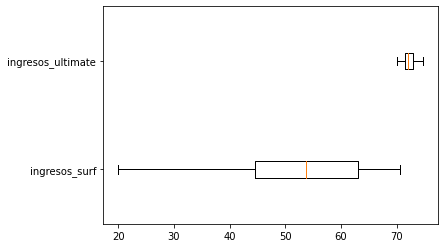

In [62]:
plt.boxplot(mean_ingresos[['ingresos_surf','ingresos_ultimate']], vert=False,labels=['ingresos_surf','ingresos_ultimate'])
plt.show()

En el caso de los ingresos, podemos ver una diferencia evidente en cuanto a los planes. Podemos ver que el plan ultimate, invierte mucho más que el plan surf, debido a su alto costo, por otro lado el plan surf, a pesar de la cantidad que gasta en servicios adicionales, no sobrepasa a los ingresos del plan ultimate.

Por otro lado, podemos ver que los dos planes tienen un sesgo a la derecha. 

En el caso de la varianza, es mayor en el plan surf, y podemos ver en el diagrama de caja y bigotes que los datos están más distribuidos que los del plan ultimate.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
~Has hecho muy buen trabajo con el análisis gráfico para cada uno de los items. Sin embargo, es posible que debido a las sugerencias realizadas en la sección anterior con respecto a la tabla, los resultados cambien ligeramente. Habrá que actualizar las conclusiones en ese caso.~
</div>

<div class="alert alert-block alert-info">
<b>En este caso el análisis cambió muy poco por el redondeo, sin embargo, escencialmente sigue siendo el mismo, los usuarios del plan ultimate gastan más que los usuarios del plan surf, debido al costo del plan ultimate. </b> <a class="tocSkip"></a>
</div>

## Prueba las hipótesis estadísticas

Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.

h0: La media de ingresos del plan surf, es igual a la media de los ingresos del plan ultimate.

h1: La media de ingresos del plan surf, es diferente a la media de los ingresos del plan ultimate.

Indice de significancia del 5%

In [63]:
# Prueba las hipótesis nula
alpha=0.05
results1 =st.ttest_ind(df_surf['ingresos'],df_ult['ingresos'],equal_var=False) # tu código: prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales

print('valor p:', results1.pvalue)

if (results1.pvalue<alpha): # tu código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 3.17039054811355e-15
Rechazamos la hipótesis nula


Se rechaza la hipotesis nula, quiere decir que los ingresos de los dos planes son diferente en promedio.

Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

h0: La media de ingresos de la región de New York - Newark - Jersey City, es igual a la media de los ingresos de las demás regiones.

h1: La media de ingresos de la región de New York - Newark - Jersey City, es diferente a la media de los ingresos de las demás regiones.

Indice de significancia del 5%

In [64]:
df_new_york=df_merged2[df_merged2['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']  
df_outside=df_merged2[df_merged2['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']

In [65]:
# Prueba las hipótesis
results2 =st.ttest_ind(df_new_york['ingresos'],df_outside['ingresos'],equal_var=False) # tu código: prueba la hipótesis de que las medias de las dos poblaciones independientes son iguales

print('valor p:', results2.pvalue)

if (results2.pvalue<alpha): # tu código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 0.03352561588530057
Rechazamos la hipótesis nula


Se rechaza la hipotesis nula, quiere decir que los ingresos de las dos regiones es diferente en promedio.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con las pruebas de hipótesis. Es posible que los resultados cambien.
</div>

## Conclusión general
En conclusión, el plan más rentable para los usuarios es el plan surf, debido a que a pesar de que gastan un poco más del límite, este no excede los 70 dolares del otro plan ultimate, además en promedio, la cantidad de minutos que se usa es menor a 500, los mensajes que se usan es menor a 40 mensajes y las gigas de internet menores a 18 gb que se acercan más a los límites del plan surf.

En cuanto a los ingresos que más le aportan a la compañia, podemos decir que el plan ultimate, aporta más ingresos a la compañia por su alto costo, a pesa de que las personas de este plan no utilizan más del límite, el costo normal, aporta más que el costo del plan surf y sus distintas adiciones.

<div class="alert alert-block alert-danger">
    
# Comentarios generales
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, Santiago. Nos quedan algunos elementos por resolver para poder aprobar tu proyecto. He dejado comentarios a lo largo del documento para ello.
</div>

<div class="alert alert-block alert-danger">
    
# Comentarios generales
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, Santiago. Nos queda un único elemento por resolver y estaremos listos para aprobar tu proyecto.
</div>

<div class="alert alert-block alert-success">
    
# Comentarios generales
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Todo corregido, Santiago! Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>